# ENUNCIADO

- Transformar los datos cargados para mantener una coherencia de tipos.

- Recuperar los valores que faltan en la tabla.

- Representar la dispersión de duración de los vuelos, por número de vuelo.

## Notas

En los vuelos 5024 y 5012, algunas veces no se registra el aeropuerto de origen.

En los vuelos 5015 y 5001, algunas veces no se registra el aeropuerto de destino.  

In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

In [2]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [103]:
import matplotlib.pyplot as plt;
#The plots in this document are made using matplotlib’s ggplot style (new in version 1.4):
import matplotlib
matplotlib.style.use('ggplot')

In [102]:
import pandas as pd
import numpy as np

In [89]:
flights = sqlContext.read.format("com.databricks.spark.csv").option("header", "true")\
                .option("mode","DROPMALFORMED").option("delimiter", ";")\
                .load("data/flights.csv")

In [90]:
flights.count()

100000

In [91]:
flights.printSchema()

root
 |-- YEAR: string (nullable = true)
 |-- MONTH: string (nullable = true)
 |-- FLIGHT_NUMBER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DESTINATION: string (nullable = true)
 |-- DURATION: string (nullable = true)
 |-- DELAY: string (nullable = true)



In [92]:
from pyspark.sql.types import IntegerType
flights = flights.withColumn("YEAR", flights['YEAR'].cast(IntegerType()))\
            .withColumn("MONTH", flights['MONTH'].cast(IntegerType()))\
            .withColumn("FLIGHT_NUMBER", flights['FLIGHT_NUMBER'].cast(IntegerType()))\
            .withColumn("DURATION", flights['DURATION'].cast(IntegerType()))\
            .withColumn("DELAY", flights['DELAY'].cast(IntegerType()))

In [93]:
flights.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DESTINATION: string (nullable = true)
 |-- DURATION: integer (nullable = true)
 |-- DELAY: integer (nullable = true)



In [94]:
flights_pd = flights.toPandas()

In [95]:
flights_pd.describe()

,YEAR,MONTH,FLIGHT_NUMBER,DURATION,DELAY
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,2011.498110,6.483010,5012.971900,128.662050,12.53170
std,1.119816,3.451969,7.796726,52.817748,13.26893
min,2010.000000,1.000000,5000.000000,30.000000,-10.00000
25%,2010.000000,3.000000,5006.000000,89.000000,1.00000
50%,2011.000000,6.000000,5013.000000,115.500000,13.00000
75%,2013.000000,9.000000,5020.000000,165.000000,24.00000
max,2013.000000,12.000000,5026.000000,275.000000,35.00000


In [ ]:
En los vuelos 5024 y 5012, algunas veces no se registra el aeropuerto de origen.
En los vuelos 5015 y 5001, algunas veces no se registra el aeropuerto de destino.

In [98]:
flights.show()

+----+-----+-------------+------+-----------+--------+-----+
|YEAR|MONTH|FLIGHT_NUMBER|ORIGIN|DESTINATION|DURATION|DELAY|
+----+-----+-------------+------+-----------+--------+-----+
|2013|   11|         5000|   TIA|        MPL|      95|   -5|
|2012|   10|         5008|   LPA|        LUX|      77|   -3|
|2013|    3|         5004|   TBS|        CGN|     251|   11|
|2011|    9|         5025|   CDG|        TXL|      89|   19|
|2013|    8|         5012|  null|        OSL|     174|   24|
|2010|    9|         5008|   LPA|        LUX|      73|   -7|
|2012|    4|         5026|   TXL|        DUS|     118|   18|
|2011|    2|         5012|   BGO|        OSL|     160|   10|
|2011|    7|         5010|   TGD|        AMS|      92|   -3|
|2011|    7|         5016|   IST|        BHX|      89|   14|
|2010|    1|         5010|   TGD|        AMS|     119|   24|
|2011|    5|         5021|   LTN|        MAN|     200|    0|
|2012|    1|         5005|   CGN|        MAD|     111|    1|
|2010|    7|         501

In [96]:
flights_1 = flights.filter('FLIGHT_NUMBER <= 5010')
flights_2 = flights.filter('FLIGHT_NUMBER > 5010').filter('FLIGHT_NUMBER <= 5014')
flights_3 = flights.filter('FLIGHT_NUMBER > 5014').filter('FLIGHT_NUMBER <= 5020')
flights_4 = flights.filter('FLIGHT_NUMBER > 5020')

In [97]:
flights_1 = flights_1.na.replace('null','BVA')
flights_2 = flights_2.na.replace('null','BGO')
flights_3 = flights_3.na.replace('null','IST')
flights_4 = flights_4.na.replace('null','SXF')

In [99]:
flights_filter = flights_1.union(flights_2).union(flights_3).union(flights_4)
flights_filter.show()

In [105]:
flights_pd = flights_filter.toPandas()

In [104]:
import seaborn as sns

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


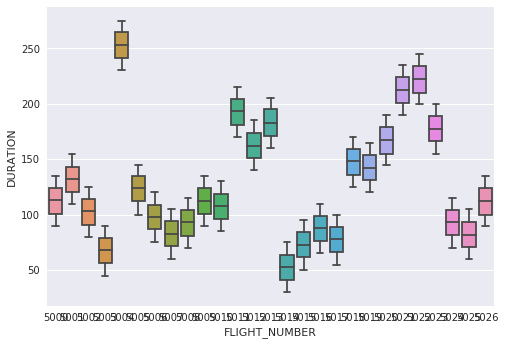

In [107]:
sns.boxplot(x = 'FLIGHT_NUMBER', y = 'DURATION', data = flights_pd)

In [115]:
flight_5015 = flights_filter.filter('FLIGHT_NUMBER = 5015')

In [118]:
flight_5015_pd = flight_5015.toPandas()

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


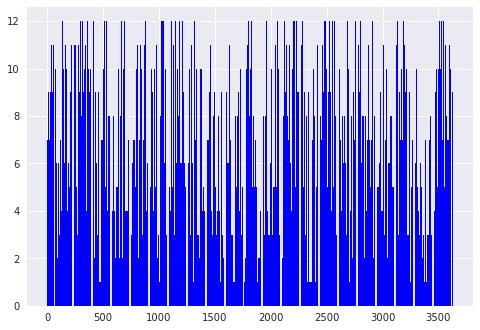

In [128]:
N = len(flight_5015_pd)
ind = np.arange(N) # the x locations for the groups
width = 0.9       # the width of the bars: can also be len(x) sequence
plt.bar(ind, flight_5015_pd.MONTH, width, color='b')
plt.show()

In [124]:
stats = flights_pd.groupby('FLIGHT_NUMBER').count()

In [125]:
stats

,YEAR,MONTH,ORIGIN,DESTINATION,DURATION,DELAY
FLIGHT_NUMBER,,,,,,
5000,3722,3722,3722,3722,3722,3722
5001,3756,3756,3756,3756,3756,3756
5002,3717,3717,3717,3717,3717,3717
5003,3619,3619,3619,3619,3619,3619
5004,3798,3798,3798,3798,3798,3798
5005,3685,3685,3685,3685,3685,3685
5006,3685,3685,3685,3685,3685,3685
5007,3677,3677,3677,3677,3677,3677
5008,3828,3828,3828,3828,3828,3828


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


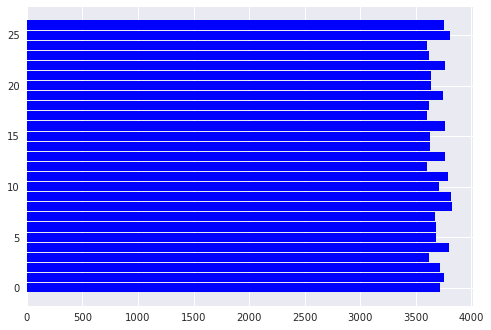

In [127]:
N = len(stats)
ind = np.arange(N) # the x locations for the groups
width = 0.9       # the width of the bars: can also be len(x) sequence
plt.barh(ind, stats.DELAY, width, color='b')
plt.show()